# Advanced Classification Part 4 - Exercises with Results

## Exercise 1

#### Task 1 
##### Load libraries that are used in this module.

#### Result:

In [1]:
# Helper packages.
import os
import pickle
import pandas as pd
import matplotlib.pyplot as plt                     
import numpy as np
import math

# Scikit-learn packages for building models and model evaluation.
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn import metrics
from pathlib import Path

#### Task 2
##### Define the directory settings.
#### Result:

In [2]:
# Set 'main_dir' to location of the project folder
home_dir = Path(".").resolve()
main_dir = home_dir.parent.parent
print(main_dir)
data_dir = str(main_dir) + "/data"
print(data_dir)

/Users/aashika/Desktop/skillsoft-advanced-classification-2022
/Users/aashika/Desktop/skillsoft-advanced-classification-2022/data


#### Task 3
##### Load the clean pickled dataset `bank_clean.sav` and save as `bank`.
##### Load the pickled `metrics_forest_ex` dataframe and save as `metrics_gbm_ex`.
##### Print the head of the data.

#### Result:

In [3]:
bank = pickle.load(open(str(data_dir) + "/bank_clean.sav","rb")) 
metrics_gbm_ex = pickle.load(open(str(data_dir)+ "/metrics_forest_ex.sav","rb"))

In [4]:
print(bank.head())

       age  campaign  emp_var_rate  cons_price_idx  cons_conf_idx  euribor3m  \
35577   32         1          -1.8          92.893          -46.2      1.244   
13950   33         2           1.4          93.918          -42.7      4.963   
29451   25         5          -1.8          93.075          -47.1      1.405   
32295   34         1          -1.8          92.893          -46.2      1.313   
27477   53         7          -0.1          93.200          -42.0      4.021   

       nr_employed  y  
35577         5099  0  
13950         5228  0  
29451         5099  1  
32295         5099  0  
27477         5196  0  


#### Task 4
##### Select the predictors by dropping variable `y` and save the result to a dataframe `X_ex`.
##### Save the target variable `y` column to `y_ex` variable.
##### Set seed as 1.
##### Split the data into training and test sets with 70:30 ratio and save respective variables to `X_train_ex`, `X_test_ex`, `y_train_ex`, `y_test_ex`.

#### Result:

In [5]:
# Select the predictors and target.
X_ex = bank.drop(['y'], axis = 1)
y_ex = np.array(bank['y'])

# Set the seed to 1.
np.random.seed(1)

# Split into training and test sets.
X_train_ex, X_test_ex, y_train_ex, y_test_ex = train_test_split(X_ex, y_ex, test_size = 0.3)

#### Task 5 
##### Instantiate a vanilla GMB model and name as `gbm_ex`.
##### Fit the model with train data.
#### Result:

In [6]:
gbm_ex = GradientBoostingClassifier()
gbm_ex.fit(X_train_ex, y_train_ex)

GradientBoostingClassifier()

#### Task 6
##### Predict the predictions and their probabilities and save as `gbm_y_predict_ex` and `gbm_y_predict_proba_ex` respectively.
##### Find the performance scores of the gbm model using function `get_performance_scores()` which we defined below. Save as `gbm_scores_ex`.


In [7]:
def get_performance_scores(y_test, y_predict, y_predict_prob, eps=1e-15, beta=0.5):

    from sklearn import metrics

    # Scores keys.
    metric_keys = ["accuracy", "precision", "recall", "f1", "fbeta", "log_loss", "AUC"]

    # Score values.
    metric_values = [None]*len(metric_keys)

    metric_values[0] = metrics.accuracy_score(y_test, y_predict)
    metric_values[1] = metrics.precision_score(y_test, y_predict)
    metric_values[2] = metrics.recall_score(y_test, y_predict)
    metric_values[3] = metrics.f1_score(y_test, y_predict)
    metric_values[4] = metrics.fbeta_score(y_test, y_predict, beta=beta)
    metric_values[5] = metrics.log_loss(y_test, y_predict_prob[:, 1], eps=eps)
    metric_values[6] = metrics.roc_auc_score(y_test, y_predict_prob[:, 1])

    perf_metrics = dict(zip(metric_keys, metric_values))

    return(perf_metrics)

#### Result:

In [8]:
gbm_y_predict_ex = gbm_ex.predict(X_test_ex)
gbm_y_predict_proba_ex = gbm_ex.predict_proba(X_test_ex)
gbm_scores_ex = get_performance_scores(y_test_ex, gbm_y_predict_ex, gbm_y_predict_proba_ex)

#### Task 7
##### Plot precision-recall curve of the three models we have run till now.
#### Result:

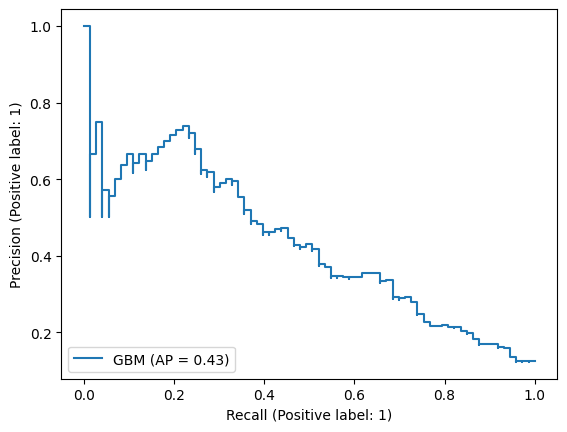

In [9]:
ax = plt.gca()
gbm_prec_recall_ex = metrics.plot_precision_recall_curve(gbm_ex, 
                                      X_test_ex, 
                                    y_test_ex,
                                    ax = ax,
                                    name = "GBM")


plt.show()

#### Task 8
##### Similarly, plot the ROC curve of the three models.
#### Result:

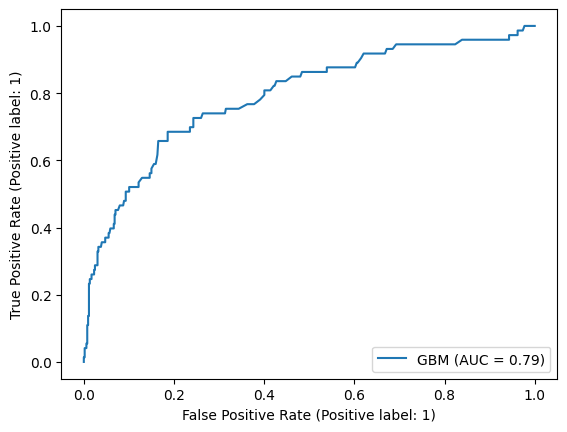

In [10]:
ax = plt.gca()
gbm_roc_ex = metrics.plot_roc_curve(gbm_ex, 
                                 X_test_ex, 
                                 y_test_ex,
                                 ax = ax,
                                 name = "GBM")


plt.show()

#### Task 9
##### Update `metrics_gbm_ex` with our gbm scores `gbm_scores_ex`. Print results.
#### Result:

In [11]:
metrics_gbm_ex.update({"GBM": gbm_scores_ex})
print(metrics_gbm_ex)

{'RF': {'accuracy': 0.8716666666666667, 'precision': 0.4411764705882353, 'recall': 0.2054794520547945, 'f1': 0.2803738317757009, 'fbeta': 0.3588516746411483, 'log_loss': 1.0075494584661249, 'AUC': 0.7337734917210366}, 'Optimized RF': {'accuracy': 0.8933333333333333, 'precision': 0.7142857142857143, 'recall': 0.2054794520547945, 'f1': 0.3191489361702127, 'fbeta': 0.4777070063694268, 'log_loss': 0.31929555370400753, 'AUC': 0.7813287931168932}, 'GBM': {'accuracy': 0.895, 'precision': 0.7083333333333334, 'recall': 0.2328767123287671, 'f1': 0.3505154639175258, 'fbeta': 0.5029585798816569, 'log_loss': 0.30041312491642347, 'AUC': 0.7918172129656105}}


#### Task 10
##### Instantiate a gbm model again and create a grid of parameter ranges as we did in class.
##### Call the grid `random_grid_ex`.
#### Result:

In [12]:
gbm_ex = GradientBoostingClassifier()

# Number of trees in random forest.
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 20)]

# Number of features to consider at every split.
max_features = ['auto', 'sqrt']

# Maximum number of levels in tree.
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)

# Minimum number of samples required to split a node.
min_samples_split = [2, 5, 10]

# Minimum number of samples required at each leaf node.
min_samples_leaf = [1, 2, 4]

learning_rate = [0.001, 0.01, 0.1, 0.2, 0.3]


# Create the random grid.
random_grid_ex = {'n_estimators': n_estimators,
                  'max_features': max_features,
                  'max_depth': max_depth,
                  'min_samples_split': min_samples_split,
                  'min_samples_leaf': min_samples_leaf,
                  'learning_rate': learning_rate}  

#### Task 11
##### Instantiate the randomized model, call it `gbm_random_ex`.
##### Use 3-fold cross-validation with 100 different combinations.
##### Fit the model with `X_train_ex` and ` y_train_ex` and take a look at the `best_params_`.
#### Result:

In [13]:
gbm_random_ex = RandomizedSearchCV(estimator = gbm_ex, 
                                   param_distributions = random_grid_ex, 
                                   n_iter = 100, 
                                   cv = 3, 
                                   verbose = 0, 
                                   random_state = 1, 
                                   n_jobs = -1)
# Fit the random search model.
gbm_random_ex.fit(X_train_ex, y_train_ex)

RandomizedSearchCV(cv=3, estimator=GradientBoostingClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'learning_rate': [0.001, 0.01, 0.1, 0.2,
                                                          0.3],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 294, 389, 484,
                                                         578, 673, 768, 863,
                                                         957, 1052, 1147, 1242,
                                                         1336, 1431, 1526, 1621,


In [14]:
gbm_random_ex.best_params_

{'n_estimators': 578,
 'min_samples_split': 10,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 60,
 'learning_rate': 0.001}

#### Task 12
##### Now use the optimized parameters to implement the optimized gradient boosting model.
##### Name it `optimized_gbm_ex`.
##### Fit with train  data.
#### Result:

In [15]:
# Set the seed.
np.random.seed(1)

optimized_gbm_ex = GradientBoostingClassifier(**gbm_random_ex.best_params_)
optimized_gbm_ex.fit(X_train_ex, y_train_ex)

GradientBoostingClassifier(learning_rate=0.001, max_depth=60,
                           max_features='auto', min_samples_split=10,
                           n_estimators=578)

## Exercise 2

#### Task 1
##### Predict on the test data using our optimized gbm classifier `optimized_gbm_ex`.
##### Predict the predictions and their probabilities and save as `optimized_gbm_y_predict_ex` and `optimized_gbm_y_predict_proba_ex` respectively.
##### Find the performance scores of the optimized forest using function `get_performance_scores()` which we defined above.





#### Result:

In [16]:
optimized_gbm_y_predict_ex = optimized_gbm_ex.predict(X_test_ex)
optimized_gbm_y_predict_proba_ex = optimized_gbm_ex.predict_proba(X_test_ex)
optimized_gbm_scores_ex = get_performance_scores(y_test_ex, 
                                                 optimized_gbm_y_predict_ex, 
                                                 optimized_gbm_y_predict_proba_ex)

#### Task 2
#### Now plot the precision-recall plot of the four models. Save the new gbm plot as `opt_gbm_prec_recall_ex`.

#### Result:

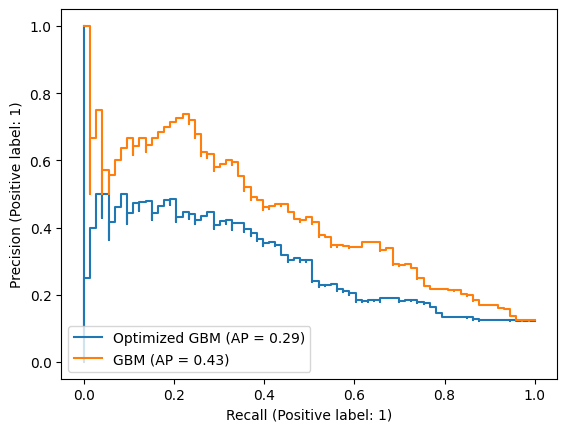

In [17]:
ax = plt.gca()
opt_gbm_prec_recall_ex = metrics.plot_precision_recall_curve(optimized_gbm_ex, 
                                    X_test_ex, 
                                    y_test_ex,
                                    ax = ax,
                                    name = "Optimized GBM")


gbm_prec_recall_ex.plot(ax = ax, name = "GBM")
plt.show()

#### Task 3
#### Similarly, plot the ROC plot of the four models. Save the new gbm plot as `opt_gbm_roc_ex`.
#### Result:

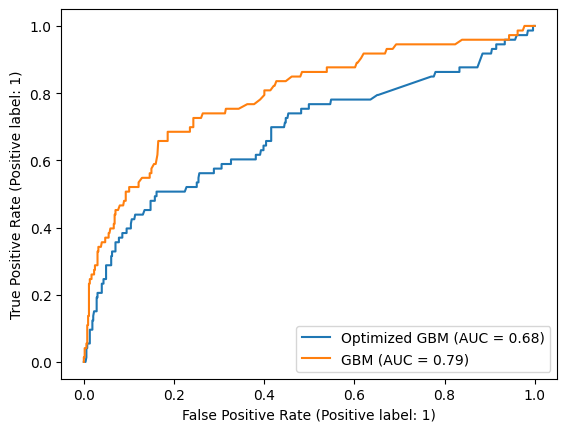

In [18]:
ax = plt.gca()
opt_gbm_roc_ex = metrics.plot_roc_curve(optimized_gbm_ex, 
                                    X_test_ex, 
                                    y_test_ex,
                                    ax = ax,
                                    name = "Optimized GBM")


gbm_roc_ex.plot(ax = ax, name = "GBM")
plt.show()

#### Task 4
##### Update `metrics_gbm_ex` with our gbm scores `optimized_gbm_scores_ex`. Print results.
##### Convert `metrics_gbm_ex` into a pandas dataframe and create new column `metric` using the index.
##### Use `pd.melt()` to switch our dataframe to long format.
#### Result:

In [19]:
metrics_gbm_ex.update({"Optimized GBM": optimized_gbm_scores_ex})
print(metrics_gbm_ex)

{'RF': {'accuracy': 0.8716666666666667, 'precision': 0.4411764705882353, 'recall': 0.2054794520547945, 'f1': 0.2803738317757009, 'fbeta': 0.3588516746411483, 'log_loss': 1.0075494584661249, 'AUC': 0.7337734917210366}, 'Optimized RF': {'accuracy': 0.8933333333333333, 'precision': 0.7142857142857143, 'recall': 0.2054794520547945, 'f1': 0.3191489361702127, 'fbeta': 0.4777070063694268, 'log_loss': 0.31929555370400753, 'AUC': 0.7813287931168932}, 'GBM': {'accuracy': 0.895, 'precision': 0.7083333333333334, 'recall': 0.2328767123287671, 'f1': 0.3505154639175258, 'fbeta': 0.5029585798816569, 'log_loss': 0.30041312491642347, 'AUC': 0.7918172129656105}, 'Optimized GBM': {'accuracy': 0.8766666666666667, 'precision': 0.4, 'recall': 0.0273972602739726, 'f1': 0.05128205128205128, 'fbeta': 0.1075268817204301, 'log_loss': 0.3354826905307848, 'AUC': 0.6820072262223492}}


In [20]:
metrics_gbm_df_ex = pd.DataFrame(metrics_gbm_ex)
metrics_gbm_df_ex["metric"] = metrics_gbm_df_ex.index
metrics_gbm_df_ex = metrics_gbm_df_ex.reset_index(drop = True)
print(metrics_gbm_df_ex.head())

         RF  Optimized RF       GBM  Optimized GBM     metric
0  0.871667      0.893333  0.895000       0.876667   accuracy
1  0.441176      0.714286  0.708333       0.400000  precision
2  0.205479      0.205479  0.232877       0.027397     recall
3  0.280374      0.319149  0.350515       0.051282         f1
4  0.358852      0.477707  0.502959       0.107527      fbeta


In [21]:
metrics_gbm_long_ex = pd.melt(metrics_gbm_df_ex, 
                              id_vars = "metric",
                              var_name = "model",
                              value_vars = list(metrics_gbm_ex.keys()))

print(metrics_gbm_long_ex.head())

      metric model     value
0   accuracy    RF  0.871667
1  precision    RF  0.441176
2     recall    RF  0.205479
3         f1    RF  0.280374
4      fbeta    RF  0.358852


#### Task 5
##### Now plot the metrics for each model for comparison.
#### Result:

/Users/aashika/anaconda3/envs/iqvia-advanced-classification-2021/lib/python3.7/site-packages/ipykernel_launcher.py:12: MatplotlibDeprecationWarning: Passing the pad parameter of tight_layout() positionally is deprecated since Matplotlib 3.3; the parameter will become keyword-only two minor releases later.
  if sys.path[0] == "":


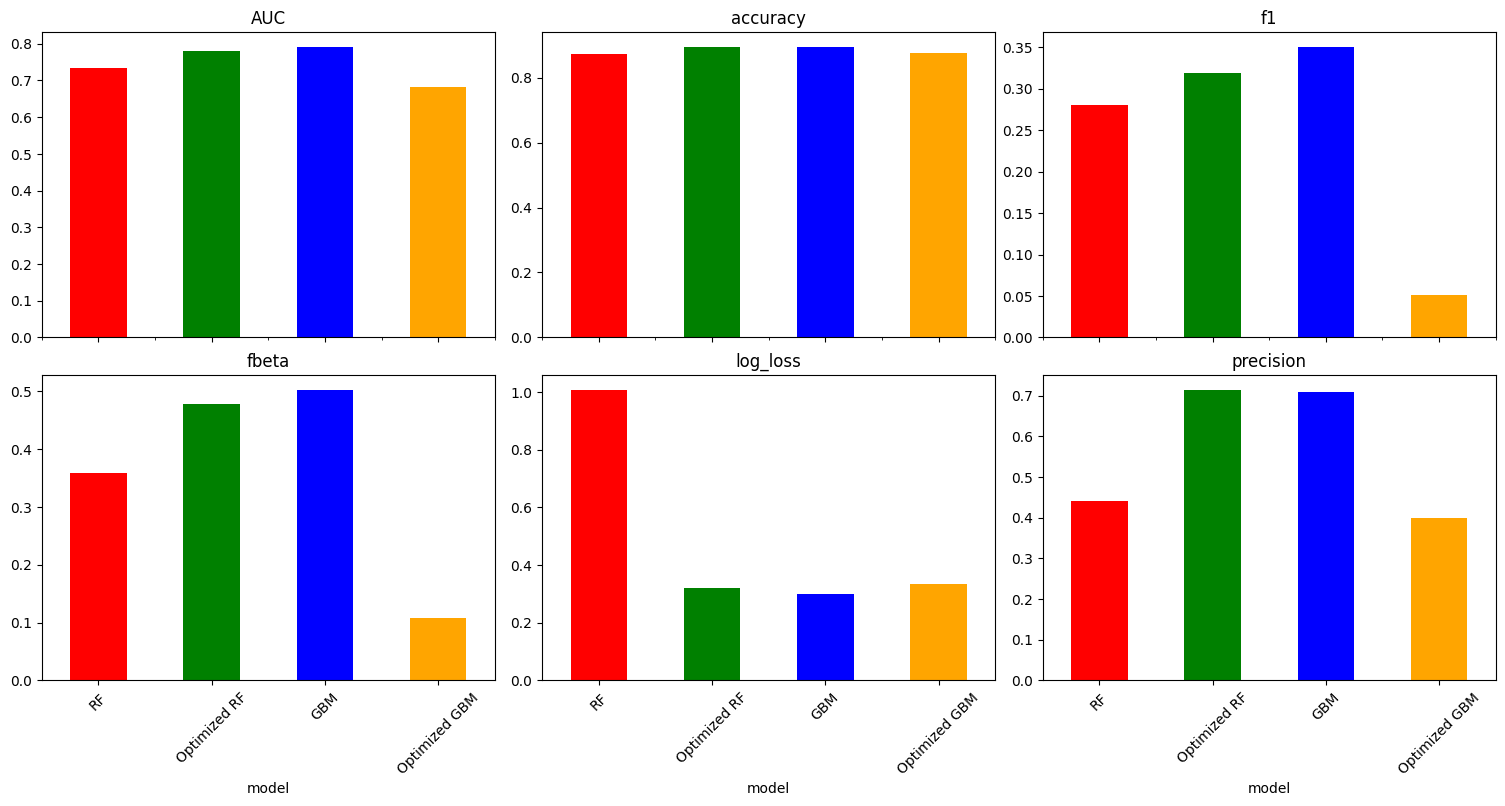

In [22]:
fig, axes = plt.subplots(2, 3, figsize = (15, 8))
for (metric, group), ax in zip(metrics_gbm_long_ex.groupby("metric"), axes.flatten()):
    group.plot(x = 'model', 
               y = 'value', 
               kind = 'bar', 
               color = ["red", "green", "blue", "orange"],
               ax = ax, 
               title = metric,
               legend = None,
               sharex = True)
    ax.xaxis.set_tick_params(rotation = 45)
plt.tight_layout(0.5)
plt.show()

#### Task 6
##### We summarize the conversion to a dataframe and plots into a single function `compare_metrics()`.
##### Use the function to perform the above actions on `metrics_gbm_ex`.

In [23]:
def compare_metrics(metrics_dict, color_list = None):
    
    import pandas as pd
    import matplotlib.pyplot as plt
    
    metrics_df = pd.DataFrame(metrics_dict)
    metrics_df["metric"] = metrics_df.index
    metrics_df = metrics_df.reset_index(drop = True)

    metrics_long = pd.melt(metrics_df,
                           id_vars = "metric",
                           var_name = "model",
                           value_vars = list(metrics_dict.keys()))
    
    if color_list is None:
        cmap = plt.rcParams['axes.prop_cycle'].by_key()['color']
        colors = cmap[:len(metrics_dict.keys())]
    else:
        colors = color_list

    fig, axes = plt.subplots(2, 3, figsize = (15, 8))
    for (metric, group), ax in zip(metrics_long.groupby("metric"), axes.flatten()):
        group.plot(x = 'model', 
                   y = 'value', 
                   kind = 'bar',
                   color = colors,
                   ax = ax,
                   title = metric,
                   legend = None,
                   sharex = True)
        
        ax.xaxis.set_tick_params(rotation = 45)
    plt.tight_layout(0.5)
     
    return((fig, axes))

#### Result:

/Users/aashika/anaconda3/envs/iqvia-advanced-classification-2021/lib/python3.7/site-packages/ipykernel_launcher.py:33: MatplotlibDeprecationWarning: Passing the pad parameter of tight_layout() positionally is deprecated since Matplotlib 3.3; the parameter will become keyword-only two minor releases later.


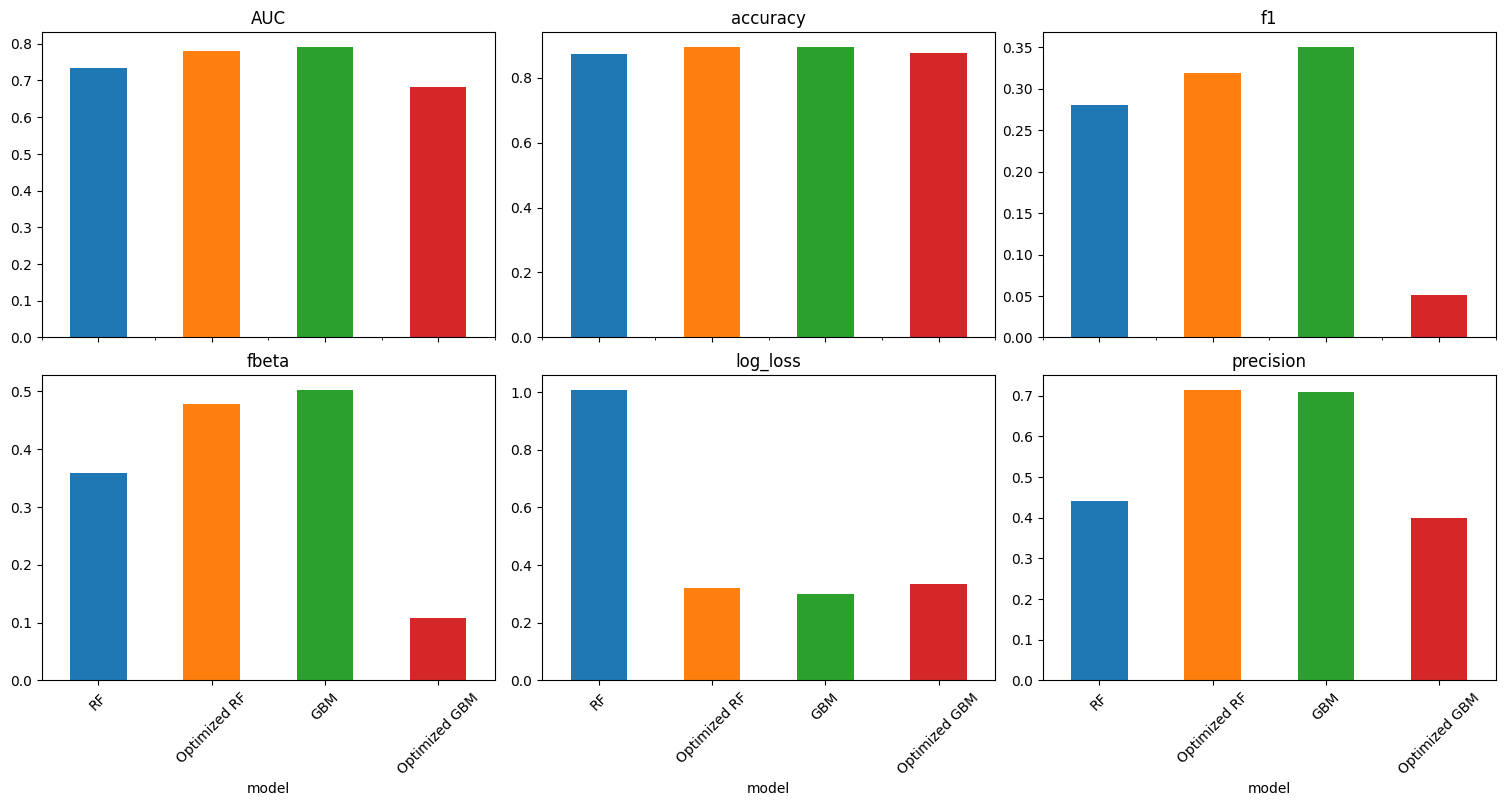

In [24]:
fig, axes = compare_metrics(metrics_gbm_ex)
plt.show()